In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
temperature = np.array([14, 18, 21, 30, 38])
num_students = np.array([15, 27, 34, 38, 52])

# Array of amount of ice cream sold; price from temperature and students
sold = np.array([2, 5, 14, 16, 26])

# Stack features together
X = np.column_stack((temperature, num_students))
y = sold
X

array([[14, 15],
       [18, 27],
       [21, 34],
       [30, 38],
       [38, 52]])

In [ ]:
np.random.seed(42)
theta = np.random.rand(X.shape[1] + 1) # Parameters for each feature and the intercept
alpha = 0.001  # Learning rate
iterations = 10000  # Number of iterations

In [ ]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)

    cost = (1/m) * np.mean((predictions - y) ** 2) / 2
    return cost

In [ ]:
def gradient_descent(X, y, theta, alpha, num_iters, tolerance=1e-3):
    m = len(y)
    n = len(theta)
    J_history = []

    for i in range(num_iters):
        predictions = []
        for j in range(m):
            prediction = 0
            for k in range(n):
                prediction += theta[k] * X[j][k]
            predictions.append(prediction)

        errors = [predictions[j] - y[j] for j in range(m)]

        derivative = [0] * n
        for k in range(n):
            sum_errors = 0
            for j in range(m):
              sum_errors += errors[j]*X[j][k]
            derivative[k] = (1 / m) * sum_errors

        step_size = 0
        for k in range(n):
            step = alpha * derivative[k]
            theta[k] -= step
            step_size += step**2

        step_size_norm = step_size**0.5

        if step_size_norm < tolerance:
          print(f"Stopping early at iteration {i}")
          break

        cost = compute_cost(X, y, theta)
        if (i == 1 or i %100 == 0):
          print(f"cost: {cost}, iteration: {i}")
        J_history.append(cost)

    return theta, J_history


In [ ]:
def newton_descent(X, y, theta, alpha, num_iters, tolerance=1e-3):
    m = len(y)
    n = len(theta)
    J_history = []

    for i in range(num_iters):
        predictions = []
        for j in range(m):
            prediction = sum(theta[k] * X[j][k] for k in range(n))
            predictions.append(prediction)

        errors = [predictions[j] - y[j] for j in range(m)]

        gradient = [0] * n
        for k in range(n):
            sum_errors = sum(errors[j] * X[j][k] for j in range(m))
            gradient[k] = (1 / m) * sum_errors

        hessian = [[0] * n for _ in range(n)]
        for k1 in range(n):
            for k2 in range(n):
                sum_second_derivatives = sum(X[j][k1] * X[j][k2] for j in range(m))
                hessian[k1][k2] = (1 / m) * sum_second_derivatives

        hessian_inv = np.linalg.inv(hessian)  # Inverting Hessian
        step_direction = np.dot(hessian_inv, gradient)

        # Update theta
        for k in range(n):
            theta[k] -= alpha * step_direction[k]

        step_size_squared = sum(step_direction[k] ** 2 for k in range(n))
        step_size = step_size_squared ** 0.5

        cost = compute_cost(X, y, theta)
        if (i%100 == 0 or i == 1):
          print(f"Iteration {i}, Cost: {cost}")

        if step_size < tolerance:
            print(f"Stopping early at iteration {i}, Step size: {step_size:.6f}, cost: {cost}")
            break

        J_history.append(cost)

    return theta, J_history


Vanilla:
cost: 108.54492740251834, iteration: 0
cost: 90.05937612200285, iteration: 1
cost: 1.6448610830252812, iteration: 100
cost: 1.5739174310474062, iteration: 200
cost: 1.5271756825847889, iteration: 300
cost: 1.4913207196605525, iteration: 400
cost: 1.4605512918036465, iteration: 500
cost: 1.4323354040638658, iteration: 600
cost: 1.405563712223523, iteration: 700
cost: 1.379746048850527, iteration: 800
cost: 1.354661822589354, iteration: 900
cost: 1.3302079007955936, iteration: 1000
cost: 1.3063324185682155, iteration: 1100
cost: 1.2830059750104952, iteration: 1200
cost: 1.2602090970032374, iteration: 1300
cost: 1.2379267811598074, iteration: 1400
cost: 1.2161461156225197, iteration: 1500
cost: 1.1948552419941891, iteration: 1600
cost: 1.174042900445439, iteration: 1700
cost: 1.1536982286380433, iteration: 1800
Stopping early at iteration 1826
Newton's:
Iteration 0, Cost: 1.1309721653798406
Iteration 1, Cost: 1.1138089049492663
Iteration 100, Cost: 0.3840509403254005
Iteration 20

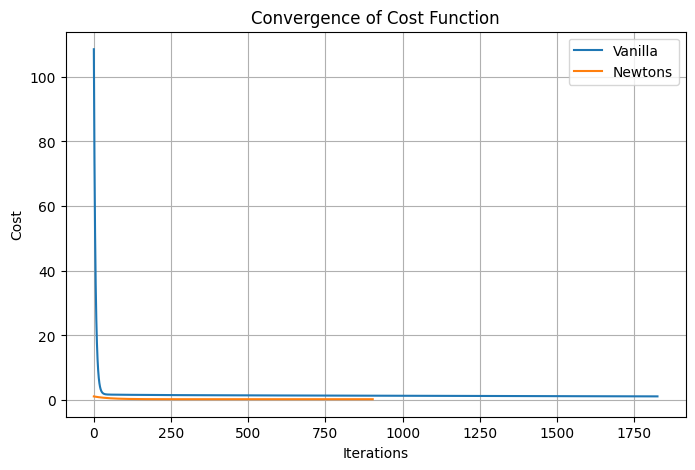


Random Examples for Comparison:
Example 4:
Features (including intercept): [ 1. 30. 38.]
Actual value: 16
Predicted value: 16.57397720104388

Example 2:
Features (including intercept): [ 1. 18. 27.]
Actual value: 5
Predicted value: 7.824545746792452

Example 3:
Features (including intercept): [ 1. 21. 34.]
Actual value: 14
Predicted value: 12.109704441606157



In [ ]:
# Assuming X, y, theta, alpha, and iterations are already defined

# Add intercept term to X
X_bias = np.hstack([np.ones((X.shape[0], 1)), X])

# Run gradient descent
print("Vanilla:")
final_theta, J_history = gradient_descent(X_bias, y, theta, alpha, iterations)
print("Newton's:")
final_theta2, J_history2 = newton_descent(X_bias, y, theta, 0.01, iterations)


# Print the final theta values
print("final theta! ", ["{:.2f}".format(t) for t in final_theta])

# Plot the convergence of the cost function
plt.figure(figsize=(8, 5))
plt.plot(J_history, label="Vanilla")
plt.plot(J_history2, label="Newtons")
plt.title('Convergence of Cost Function')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.grid(True)
plt.show()

# Select 3 random examples for comparison
num_examples = 3
random_indices = np.random.choice(X_bias.shape[0], num_examples, replace=False)

print("\nRandom Examples for Comparison:")
for idx in random_indices:
    X_example = X_bias[idx]
    y_actual = y[idx]
    y_pred = np.dot(X_example, final_theta)
    print(f"Example {idx + 1}:")
    print(f"Features (including intercept): {X_example}")
    print(f"Actual value: {y_actual}")
    print(f"Predicted value: {y_pred}\n")
